# Importing the dataset.

In [58]:
import pandas as pd
import numpy as np
df=pd.read_csv("transformed_CVD_data.csv")
df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [59]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


# Segregating Features & Target Variables

In [32]:
y=df['cardio']
x=df.drop(['cardio'],axis=1)

array([[<AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'weight'}>],
       [<AxesSubplot:title={'center':'ap_hi'}>,
        <AxesSubplot:title={'center':'ap_lo'}>,
        <AxesSubplot:title={'center':'cholesterol'}>],
       [<AxesSubplot:title={'center':'gluc'}>,
        <AxesSubplot:title={'center':'smoke'}>,
        <AxesSubplot:title={'center':'alco'}>],
       [<AxesSubplot:title={'center':'active'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

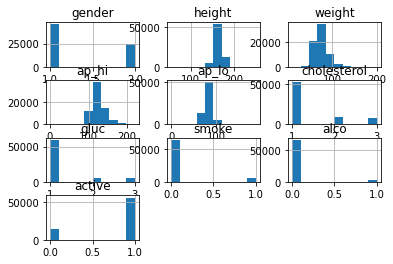

In [9]:
x.hist()

In [33]:
from sklearn.model_selection import train_test_split
xtr,xts,ytr,yts=train_test_split(x,y,test_size=0.25,random_state=23,stratify=y)

In [2]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import torch
import torch.nn as nn # neural network
import torch.nn.functional as F

from sklearn.feature_selection import SelectKBest, chi2,f_classif,RFE
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


 # Implementation of ANN.


In [35]:
#ANN IMPORTANT LIBRARIES
# documentation - https://pytorch.org/tutorials/beginner/basics/intro.html

import torch
import torch.nn as nn # neural network
import torch.nn.functional as F

### first create tensors for ANN

xtr=torch.FloatTensor(xtr.values)
xts=torch.FloatTensor(xts.values)
#converts the values into floating point as it is cumpulsory for the independant features and not prerequisite for the dependant ones
ytr=torch.LongTensor(ytr.values) 
yts=torch.LongTensor(yts.values) 

# With 2 Layers

In [36]:
# developing model with pytorch
#the initial class will have input features thats 1 less then the columns for the target, the hidden layers according to our choice, output feature

#RELU = Rectified Linear Unit
#SILU = Sigmoid Linear Unit

class ANN_Model(nn.Module): #this will inherit NN library
    def __init__(self,input_features=11,hidden1=11,hidden2=11,out_features=11): #Requires input features,hidden layers, multiple layers and output layer
        super().__init__()
        #fully connected layer ,to create a dense layer we have input features with hidden layer
        self.f_connected1=nn.Linear(input_features,hidden1)
        self.f_connected2=nn.Linear(hidden1,hidden2)
        
        self.out=nn.Linear(hidden2,out_features)
    def forward(self,x):
        #forwards propogation
        #tracks the gradient decent, it have all the activation functions
        # connect the fully connected neural network to the hidden layer with optimiser
        x=F.relu_(self.f_connected1(x)) #parameter x has all the information connected to the layer
        x=F.relu_(self.f_connected2(x)) # Relu Transormed
        # Incase of SILU Use These
        #x=F.silu(self.f_connected1(x)) #parameter x has all the information connected to the layer
        #x=F.silu(self.f_connected2(x)) # Relu Transormed
        
        x=self.out(x)
        return x
    
    

# With 1 Layer

In [51]:
# developing model with pytorch
#the initial class will have input features thats 1 less then the columns for the target, the hidden layers according to our choice, output feature

#RELU = Rectified Linear Unit

class ANN_Model(nn.Module): #this will inherit NN library
    def __init__(self,input_features=11,hidden1=5,out_features=11): #Requires input features,hidden layers, multiple layers and output layer
        super().__init__()
        
        #fully connected layer ,to create a dense layer we have input features with hidden layer
        self.f_connected1=nn.Linear(input_features,hidden1)
        
        
        self.out=nn.Linear(hidden1,out_features)
    def forward(self,x):
        #forwards propogation
        #tracks the gradient decent, it have all the activation functions
        # connect the fully connected neural network to the hidden layer with optimiser
        x=F.relu_(self.f_connected1(x)) #parameter x has all the information connected to the layer       
        # Incase of SILU use This
        #x=F.silu(self.f_connected1(x)) #parameter x has all the information connected to the layer       
        
        x=self.out(x)
        return x
# Used Sigmoid , Relu, silu( sigmoid linear unit),normalise, 
    

In [52]:
# Instantiate our ANN_Model

torch.manual_seed(20)
model=ANN_Model()
#developed the model for the neural network
model.parameters # shows the features of the neural network we developed

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=11, out_features=5, bias=True)
  (out): Linear(in_features=5, out_features=11, bias=True)
)>

In [53]:
## backward Propogation-- define the LOSS function And Optimiser ( to reduce the gap between the difference of the required target)

#cross entropy loss function= for multi classification loss
loss_function=nn.CrossEntropyLoss()

# adam optimizer is best for these processes
# model.parameters() is know as a generator of the neural network
# learning rate should be optimum to find a global minima for the function thus 0.01
optimizer=torch.optim.Adam(model.parameters(),lr=0.001) 
#deploying the neural netowrk
epochs=3000
final_losses=[]
for i in range(epochs):
    i+=1
    y_pred=model.forward(xtr)
    loss=loss_function(y_pred,ytr)
    final_losses.append(loss.item())
    if i%10==1:  #for every 10 epochs print the loss values
        print("Epoch Number: {} and the Loss : {}".format(i,loss.item()))
    #to reduce the loss we use the optimizer with the zero_grad = it creates the gradients of all optimised class
    optimizer.zero_grad()
    loss.backward() # performs back propogation
    optimizer.step() #performs the single optimizer step
    
    # the error due to the init arugument will be mitigated by adding brackets to the super init cause then it becomes eligible to inheriting the nn model

Epoch Number: 1 and the Loss : 1.3126049041748047
Epoch Number: 11 and the Loss : 1.0055787563323975
Epoch Number: 21 and the Loss : 0.8547446131706238
Epoch Number: 31 and the Loss : 0.7535191178321838
Epoch Number: 41 and the Loss : 0.6838841438293457
Epoch Number: 51 and the Loss : 0.6466647982597351
Epoch Number: 61 and the Loss : 0.6291723847389221
Epoch Number: 71 and the Loss : 0.6203347444534302
Epoch Number: 81 and the Loss : 0.6151403784751892
Epoch Number: 91 and the Loss : 0.6115875244140625
Epoch Number: 101 and the Loss : 0.6088815927505493
Epoch Number: 111 and the Loss : 0.6066876649856567
Epoch Number: 121 and the Loss : 0.6048454642295837
Epoch Number: 131 and the Loss : 0.6032639741897583
Epoch Number: 141 and the Loss : 0.6018919348716736
Epoch Number: 151 and the Loss : 0.6006934642791748
Epoch Number: 161 and the Loss : 0.5996410250663757
Epoch Number: 171 and the Loss : 0.5987122058868408
Epoch Number: 181 and the Loss : 0.5978878736495972
Epoch Number: 191 and t

Epoch Number: 1581 and the Loss : 0.5779619812965393
Epoch Number: 1591 and the Loss : 0.5779190063476562
Epoch Number: 1601 and the Loss : 0.5778765082359314
Epoch Number: 1611 and the Loss : 0.5778344869613647
Epoch Number: 1621 and the Loss : 0.5777929425239563
Epoch Number: 1631 and the Loss : 0.577751874923706
Epoch Number: 1641 and the Loss : 0.5777113437652588
Epoch Number: 1651 and the Loss : 0.5776711702346802
Epoch Number: 1661 and the Loss : 0.577631413936615
Epoch Number: 1671 and the Loss : 0.5775920748710632
Epoch Number: 1681 and the Loss : 0.5775530338287354
Epoch Number: 1691 and the Loss : 0.5775143504142761
Epoch Number: 1701 and the Loss : 0.5774760842323303
Epoch Number: 1711 and the Loss : 0.5774381160736084
Epoch Number: 1721 and the Loss : 0.5774067044258118
Epoch Number: 1731 and the Loss : 0.5774445533752441
Epoch Number: 1741 and the Loss : 0.5773810148239136
Epoch Number: 1751 and the Loss : 0.577311098575592
Epoch Number: 1761 and the Loss : 0.5772637128829

Text(0.5, 0, 'Epoch')

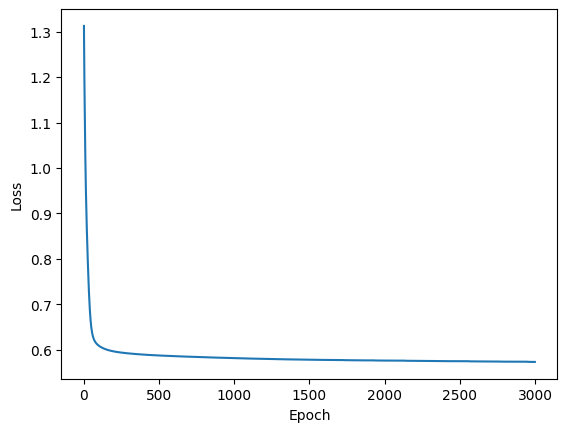

In [54]:
# plot the loss function
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(epochs),final_losses) # plot of all epoch to the list of every stored losses
plt.ylabel('Loss')
plt.xlabel('Epoch')


In [55]:
# predicting the values

predictions=[]
with torch.no_grad(): #now we dont req gradient as its out final outcome 
    for i,data in enumerate(xts):
        y_pred=model(data)
        #print(y_pred.argmax().item())
        predictions.append(y_pred.argmax().item())

# For Saving the model

In [49]:
# save the model
torch.save(model,'Cardio_Vascular_2layer.pt')

In [50]:
#loading a neural model
model=torch.load('Cardio_Vascular_2layer.pt')
model.eval()

ANN_Model(
  (f_connected1): Linear(in_features=11, out_features=11, bias=True)
  (f_connected2): Linear(in_features=11, out_features=11, bias=True)
  (out): Linear(in_features=11, out_features=11, bias=True)
)

In [56]:
torch.save(model,'Cardio_Vascular_1layer_unorthodox.pt')

In [57]:
#loading a neural model
model=torch.load('Cardio_Vascular_1layer_unorthodox.pt')
model.eval()

ANN_Model(
  (f_connected1): Linear(in_features=11, out_features=5, bias=True)
  (out): Linear(in_features=5, out_features=11, bias=True)
)

# Plotting the Classification Report and the Confusion Matrix for ANN Models.

ANN_Model(
  (f_connected1): Linear(in_features=11, out_features=11, bias=True)
  (f_connected2): Linear(in_features=11, out_features=11, bias=True)
  (out): Linear(in_features=11, out_features=11, bias=True)
) Test Acurracy: 0.7190857142857143
ANN_Model(
  (f_connected1): Linear(in_features=11, out_features=11, bias=True)
  (f_connected2): Linear(in_features=11, out_features=11, bias=True)
  (out): Linear(in_features=11, out_features=11, bias=True)
) Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.76      0.73      8755
           1       0.74      0.68      0.71      8745

    accuracy                           0.72     17500
   macro avg       0.72      0.72      0.72     17500
weighted avg       0.72      0.72      0.72     17500

ANN_Model(
  (f_connected1): Linear(in_features=11, out_features=11, bias=True)
  (f_connected2): Linear(in_features=11, out_features=11, bias=True)
  (out): Linear(in_features=11, out_features

Text(8.222222222222223, 0.5, 'Predicted Value')

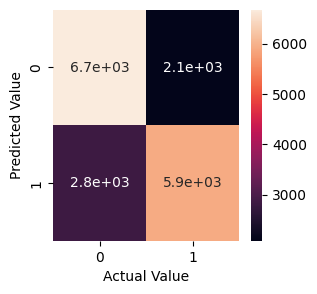

In [42]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
score=accuracy_score(yts,predictions)
score
print("{} Test Acurracy: {}".format(model, score))

print("{} Classification Report:\n {}".format(model, classification_report(yts,predictions)))

print("{} Confusion Matrix:\n {}".format(model, confusion_matrix(yts,predictions)))
plt.figure(figsize=(3,3))
sns.heatmap(confusion_matrix(yts,predictions),annot=True)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")

